$  % These are commands to simply writing vectors in bold. 
   \newcommand{\RR}{\mathbb{R}}
   \newcommand{\R}{\mathbb{R}}
   \newcommand{\B}[2][\varepsilon]{ B_{#1} \left( #2 \right) }
   \newcommand{\vec}[1]{ \boldsymbol{\mathbf{#1}} }
   \newcommand{\Z}{\mathbb{Z}}
   \newcommand{\C}{\mathbb{C}}
   \newcommand{\tr}[1]{\mathrm{tr}\left( #1 \right)}
   \newcommand{\ran}{\mathrm{ran}}
   \newcommand{\MC}[1]{\mathcal{M}_{#1}\left(\mathbb{C}\right)}
   \newcommand{\MR}[1]{\mathcal{M}_{#1}\left(\mathbb{R}\right)}
   \newcommand{\bkt}[1]{\left\langle #1 \right\rangle}
   \newcommand{\brc}[1]{\left\lbrace #1 \right\rbrace}
   \newcommand{\set}[2]{\left\lbrace #1 \middle\vert #2 \right\rbrace}
   \newcommand{\sfrac}[2]{\mathstrut^{#1}/_{#2}}
   \newcommand{\ra}{\rightarrow}
   \newcommand{\hip}[2]{\left\langle {#1},{#2} \right\rangle}
   \newcommand{\norm}[1]{\left\Vert {#1} \right\Vert}
   \newcommand{\hnorm}[1]{\left\Vert {#1} \right\Vert_2}
   \DeclareMathOperator*{\argmax}{argmax} % thin space, limits underneath in displays
   \DeclareMathOperator*{\argmin}{argmin} % no space, limits underneath in displays
$    

<h1 align='center'>LINEAR PROGRAMMING</h1>
<h3 align='center'>Solving Optimization Problems</h3>
<p>&nbsp;</p//. 

First, we load some packages and do some configuration:

In [2]:
%matplotlib inline 
from matplotlib import pyplot as plt
import numpy as np 
%precision 9

from pandas import DataFrame
import warnings
warnings.simplefilter('ignore')

%run -i SimplexTools.py

The following commands are now available

* __add_method__ = adds a method to an instance of any class
* __var__ = creates a variable for creating Tableaus
* __param__ = creates a parameter for creating Tableaus
* __Vars__ = creates var objects from a list or string
* __Params__ = creates param objects from a list or structure
* __LinearExpression__ = class for expressions for linear programs
* __LinearRelation__ = class for equations and inequalities
* __GaussPivot__ = Gaussian Row Operations pivot for a pandas DataFrame
* __Tableau__ = Maps linear program as dictionary to DataFrame with GaussPivot

Also, the following helper methods are available:
* __BasicSolution__ = prints basic solution for a given tableau
* __OrderBasis__ = Arranges the simplex tableau into [I,M] form, where I is the identity matrix and M is what is left over
* __Simplex__ = Create simplex Tableau for a linear program, adding slack or surplus variables if necessary.  The solve method only implements maximization. 

NOTE: __GaussPivot__ can be applied directly to any DataFrame




__1.__ Draw the feasible region and include at least 4 level curves ( i.e., 4 levels of $z$) for the following linear
program. 
$$\begin{array}{ll}
maximize & z=2x+7y \\ 
subject \; to & x+y\leq 80 \\ 
& 11x + 8y\leq 88 \left( 8\right)  \\ 
& 12x + 7y\leq 96 \left( 7\right)  \\ 
& x\geq 0,y\geq 0
\end{array}
$$
What are the vertices of the feasible region? Find the solution using the
simplex method. Report the sequence of tableaus and the basic solutions.  Also report the solution 
that is produced using the graphical method (moving from vertex to vertex in the feasible region). 

### Solution

In [36]:
%run -i MainExampleTools.py

imported add_method, plotfill, and xyspines


#### Feasible Region

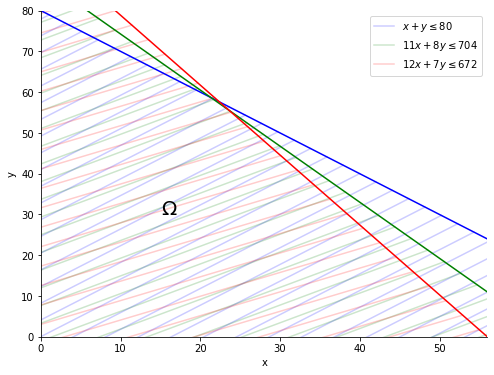

In [108]:
fig, axes = plt.subplots(figsize = (8,6))
add_method(axes, plotfill)

#plot the feasible region satisfying the constraint
x = np.linspace(0,80,100)
axes.plotfill( x, dict(a=1,b= 1,c=80), region = 'below', color = 'blue', hatched = True, label = '$x+y \leq 80$' )
axes.plotfill( x, dict(a=11,b= 8,c=704), region = 'below', color = 'green', hatched = True, label = '$11x+8y \leq 704$' )
axes.plotfill( x, dict(a=12,b=7,c=672), region = 'below', color = 'red', hatched = True, label = '$12x +7 y \leq 672$')

# plot the initial vertex 
#axes.scatter([0],[25], color = 'brown', zorder = 10)
axes.set_xlim(0,56)
plt.xlabel('x')
plt.ylabel('y')
axes.set_ylim(0,80)
axes.text(15,30, '$\Omega$', fontsize = 20 )
axes.legend();

#### Vertices of the feasible region

In [41]:
# importing library sympy
from sympy import symbols, Eq, solve

x, y= symbols('x,y')
  
# defining equations
eq1 = Eq((x+y), 80)
eq2 = Eq((11*x+8*y), 704)
eq3 = Eq((12*x+7*y), 672)

In [42]:
print(solve((eq1, eq3), (x, y)))

{x: 112/5, y: 288/5}


In [43]:
print(solve((eq2, eq3), (x, y)))

{x: 448/19, y: 1056/19}


$A(0,0),\quad B(56.0), \quad C(0,80),\quad D\left(\frac{112}{5},\frac{288}{5}\right), \quad  E\left(\frac{448}{19}, \frac{1056}{19}\right) $

#### Level curves

$$\text{Let}  z = k$$

This implies

$$2x+7y = k$$

$A(0,0) \Longrightarrow 2(0) + 7(0) = 0 \Longrightarrow k = 0$

$B(56,0) \Longrightarrow 2(56) + 7(0) = 112 \Longrightarrow k = 112$

$C(0,80) \Longrightarrow 2(0) + 7(80) = 160 \Longrightarrow k = 160$

$D\left(\frac{112}{5},\frac{288}{5}\right) \Longrightarrow 2(112/5) + 7(288/5) = 80\Longrightarrow k = 80$

$E\left(\frac{448}{19}, \frac{1056}{19}\right) \Longrightarrow 2(448/19) + 7(1056/19) = \frac{1504}{19}\Longrightarrow k =  \frac{1504}{19} = 79.16$












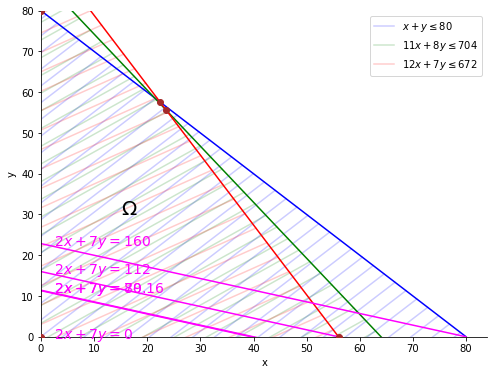

In [133]:
fig, axes = plt.subplots(figsize = (8,6))
add_method(axes, plotfill)

#plot the feasible region satisfying the constraint
x = np.linspace(0,80,100)
axes.plotfill( x, dict(a=1,b= 1,c=80), region = 'below', color = 'blue', hatched = True, label = '$x+y \leq 80$' )
axes.plotfill( x, dict(a=11,b= 8,c=704), region = 'below', color = 'green', hatched = True, label = '$11x+8y \leq 704$' )
axes.plotfill( x, dict(a=12,b=7,c=672), region = 'below', color = 'red', hatched = True, label = '$12x +7 y \leq 672$')
axes.set_xlim(0,)
axes.set_ylim(0,80)
plt.xlabel('x')
plt.ylabel('y')

axes.text(15,30, '$\Omega$', fontsize = 20 )
axes.legend();

# plot the initial vertex and the level curve containing it

for k in [0]:
    y = (k-2*x)/7
    axes.plot( x,y,color='magenta'  )
axes.text( x[2],y[2], ' $2x+7y = %s$' % k, color = 'magenta', fontsize = 14)
axes.scatter([0],[0], color = 'brown', zorder = 10)
    

for k in [79.16]:
    y = (k-2*x)/7
    axes.plot( x,y,color='magenta'  )
axes.text( x[2],y[2], ' $2x+7y = %s$' % k, color = 'magenta', fontsize = 14)
axes.scatter([22.4],[57.6], color = 'brown', zorder = 10)
    
for k in [80]:
    y = (k-2*x)/7
    axes.plot( x,y,color='magenta'  )
axes.text( x[2],y[2], ' $2x+7y = %s$' % k, color = 'magenta', fontsize = 14)
axes.scatter([23.57],[55.58], color = 'brown', zorder = 10)

for k in [112]:
    y = (k-2*x)/7
    axes.plot( x,y,color='magenta'  )
axes.text( x[2],y[2], ' $2x+7y = %s$' % k, color = 'magenta', fontsize = 14)
axes.scatter([56],[0], color = 'brown', zorder = 10)
    
for k in [160]:
    y = (k-2*x)/7
    axes.plot( x,y,color='magenta'  )
axes.text( x[2],y[2], ' $2x+7y = %s$' % k, color = 'magenta', fontsize = 14)
axes.scatter([0],[80], color = 'brown', zorder = 10)

#### Solving using the Simplex Method

\begin{eqnarray*}
maximize   \;\;   &  2x     & +   7y      &       &        &         \\
subject\; to \;\; &  \;\;\;\; x  & +   y   & + s_1 &        &  &   = 80\\
                  &  \;\; 11 x   & +   8y   &       & + s_2  &  & = 704 \\
                  &  \;\; 12 x    & +   7y   &    &   & + s_3  & = 672 \\
                  & x\ge 0, & y \ge 0, & s_1 \ge 0, & s_2 \ge 0 & 
\end{eqnarray*}

In [136]:
Vars('x y s_1 s_2 s_3')
LP = dict( )
LP['z'] = -2*x - 7*y
LP['Con1'] =   x + y + s_1 == 80
LP['Con2'] = 11*x + 8*y + s_2 == 704
LP['Con3'] = 12*x + 7*y + s_3 == 672
LP

{'z':  -2*x - 7*y,
 'Con1':  x + y + s_1 ==  80,
 'Con2':  11*x + 8*y + s_2 ==  704,
 'Con3':  12*x + 7*y + s_3 ==  672}

In [861]:
#initial tableau

Tb = Tableau(LP)
Tb

,x,y,s_1,s_2,s_3,b,z
Con1,1.0,1.0,1.0,0.0,0.0,80.0,0.0
Con2,11.0,8.0,0.0,1.0,0.0,704.0,0.0
Con3,12.0,7.0,0.0,0.0,1.0,672.0,0.0
Objective1,-2.0,-7.0,0.0,0.0,0.0,0.0,1.0


In [863]:
OrderBasis(Tb)

,s_1,s_2,s_3,x,y,b,z
Con1,1.0,0.0,0.0,1.0,1.0,80.0,0.0
Con2,0.0,1.0,0.0,11.0,8.0,704.0,0.0
Con3,0.0,0.0,1.0,12.0,7.0,672.0,0.0
Objective1,0.0,0.0,0.0,-2.0,-7.0,0.0,1.0


In [865]:
BasicSolution(Tb)

The variable $\mathbf{y}$ moves into the basis

In [868]:

Tb[ ['y', 'b'] ]

,y,b
Con1,1.0,80.0
Con2,8.0,704.0
Con3,7.0,672.0
Objective1,-7.0,0.0


In [870]:
ratios = Tb.loc[ :, ['y', 'b'] ]
ratios['ratio'] = Tb.b/Tb.y
ratios

,y,b,ratio
Con1,1.0,80.0,80.0
Con2,8.0,704.0,88.0
Con3,7.0,672.0,96.0
Objective1,-7.0,0.0,-0.0


The pivot is con1, s_1 moves out of basis

In [873]:
Tb.GaussPivot( 'Con1', 'y')
Tb

,x,y,s_1,s_2,s_3,b,z
Con1,1.0,1.0,1.0,0.0,0.0,80.0,0.0
Con2,3.0,0.0,-8.0,1.0,0.0,64.0,0.0
Con3,5.0,0.0,-7.0,0.0,1.0,112.0,0.0
Objective1,5.0,0.0,7.0,0.0,0.0,560.0,1.0


In [875]:
OrderBasis(Tb)

,y,s_2,s_3,x,s_1,b,z
Con1,1.0,0.0,0.0,1.0,1.0,80.0,0.0
Con2,0.0,1.0,0.0,3.0,-8.0,64.0,0.0
Con3,0.0,0.0,1.0,5.0,-7.0,112.0,0.0
Objective1,0.0,0.0,0.0,5.0,7.0,560.0,1.0


In [877]:
BasicSolution(Tb)

The values $y = 80$ and $x = 0$ maximizes the objective: $z = 2x+7y$

Thus $z^* = 160$ and $(x^*,y^*) = (0,80)$

__2.__ Set up and solve the following: A funds manager receives \\$100,000 from a
new client for the purchase of stocks and is required to choose between blue
chip stocks (BLUE), tech stocks(TECH), and high risk/high yield stocks
(HRHY). The expected rate of return on BLUE is \\$1 per share, the rate of
return on TECH is \\$2 per share, and the rate of return on HRHY is \\$15 per
share. Brokerage house rules require that

    a. The fund manager is to purchase no more than 2,500 shares

    b. The amount of BLUE stocks purchased exceeds the total of the other stocks purchased

    c.  The total of HRHY stocks purchased never exceeds 10 percent of the BLUE stocks purchased

If the cost of BLUE stocks is \\$100 per share, the cost of TECH stocks is
\\$60 per share, and the cost of HRHY stocks is \\$40 per share, then how many
shares of each should the fund manager purchase in order to maximize the
expected return on investment. You must state the basic solution
corresponding to each Tableau in the sequence of Tableaus.

### Solution

Let $x_1$ be the number of blue chip stocks (BLUE)
Let $x_2$ be the number of tech stocks(TECH), and
Let $x_3$ be the number of high risk/high yield stocks (HRHY).

Also, let $s_1$, $s_2$, and $s_3$ be the surplus associated with $x_1$, $x_2$, and $x_3$, respectively.



In [978]:
Vars('x_1 x_2 x_3 s_1 s_2 s_3 s_4  ')
LP = dict( )
LP['z'] = -1*x_1 - 2*x_2 - 15*x_3
LP['Con1'] =   x_1 + x_2 + x_3 + s_1 == 2500
LP['Con2'] = 100*x_1 + 60*x_2  + 40*x_3 + s_2   == 100000
LP['Con3'] = -1*x_1 + x_2   + x_3 + s_3       == 0
LP['Con4'] = -0.1*x_1 +      x_3   + s_4     == 0
LP

{'z': -x_1 - 2*x_2 - 15*x_3,
 'Con1':  x_1 + x_2 + x_3 + s_1 ==  2500,
 'Con2':  100*x_1 + 60*x_2 + 40*x_3 + s_2 ==  100000,
 'Con3': -x_1 + x_2 + x_3 + s_3 == 0,
 'Con4':  -0.1*x_1 + x_3 + s_4 == 0}

In [980]:
#initial tableau

Tb = Tableau(LP)
Tb

,x_1,x_2,x_3,s_1,s_2,s_3,s_4,b,z
Con1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,2500.0,0.0
Con2,100.0,60.0,40.0,0.0,1.0,0.0,0.0,100000.0,0.0
Con3,-1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
Con4,-0.1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
Objective1,-1.0,-2.0,-15.0,0.0,0.0,0.0,0.0,0.0,1.0


In [982]:
OrderBasis(Tb)

,s_1,s_2,s_3,s_4,x_1,x_2,x_3,b,z
Con1,1.0,0.0,0.0,0.0,1.0,1.0,1.0,2500.0,0.0
Con2,0.0,1.0,0.0,0.0,100.0,60.0,40.0,100000.0,0.0
Con3,0.0,0.0,1.0,0.0,-1.0,1.0,1.0,0.0,0.0
Con4,0.0,0.0,0.0,1.0,-0.1,0.0,1.0,0.0,0.0
Objective1,0.0,0.0,0.0,0.0,-1.0,-2.0,-15.0,0.0,1.0


In [984]:
BasicSolution(Tb)

The variable $\mathbf{x_3}$ moves into the basis


In [987]:
Tb[ ['x_3', 'b'] ]

,x_3,b
Con1,1.0,2500.0
Con2,40.0,100000.0
Con3,1.0,0.0
Con4,1.0,0.0
Objective1,-15.0,0.0


In [992]:
Tb.GaussPivot( 'Con3', 'x_3')
Tb

,x_1,x_2,x_3,s_1,s_2,s_3,s_4,b,z
Con1,2.0,0.0,0.0,1.0,0.0,-1.0,0.0,2500.0,0.0
Con2,140.0,20.0,0.0,0.0,1.0,-40.0,0.0,100000.0,0.0
Con3,-1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
Con4,0.9,-1.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0
Objective1,-16.0,13.0,0.0,0.0,0.0,15.0,0.0,0.0,1.0


In [994]:
OrderBasis(Tb)


,s_1,s_2,x_3,s_4,x_1,x_2,s_3,b,z
Con1,1.0,0.0,0.0,0.0,2.0,0.0,-1.0,2500.0,0.0
Con2,0.0,1.0,0.0,0.0,140.0,20.0,-40.0,100000.0,0.0
Con3,0.0,0.0,1.0,0.0,-1.0,1.0,1.0,0.0,0.0
Con4,0.0,0.0,0.0,1.0,0.9,-1.0,-1.0,0.0,0.0
Objective1,0.0,0.0,0.0,0.0,-16.0,13.0,15.0,0.0,1.0


The variable $\mathbf{x_1}$ moves into the basis

In [997]:

Tb[ ['x_1', 'b'] ]

,x_1,b
Con1,2.0,2500.0
Con2,140.0,100000.0
Con3,-1.0,0.0
Con4,0.9,0.0
Objective1,-16.0,0.0


In [999]:
ratios = Tb.loc[ :, ['x_1', 'b'] ]
ratios['ratio'] = Tb.b/Tb.x_1
ratios

,x_1,b,ratio
Con1,2.0,2500.0,1250.000000
Con2,140.0,100000.0,714.285714
Con3,-1.0,0.0,-0.000000
Con4,0.9,0.0,0.000000
Objective1,-16.0,0.0,-0.000000


In [1001]:
Tb.GaussPivot( 'Con4', 'x_1')
Tb

,x_1,x_2,x_3,s_1,s_2,s_3,s_4,b,z
Con1,0.0,2.222222,0.0,1.0,0.0,1.222222,-2.222222,2500.0,0.0
Con2,0.0,175.555556,0.0,0.0,1.0,115.555556,-155.555556,100000.0,0.0
Con3,0.0,-0.111111,1.0,0.0,0.0,-0.111111,1.111111,0.0,0.0
Con4,1.0,-1.111111,0.0,0.0,0.0,-1.111111,1.111111,0.0,0.0
Objective1,0.0,-4.777778,0.0,0.0,0.0,-2.777778,17.777778,0.0,1.0


In [1003]:
OrderBasis(Tb)

,s_1,s_2,x_3,x_1,x_2,s_3,s_4,b,z
Con1,1.0,0.0,0.0,0.0,2.222222,1.222222,-2.222222,2500.0,0.0
Con2,0.0,1.0,0.0,0.0,175.555556,115.555556,-155.555556,100000.0,0.0
Con3,0.0,0.0,1.0,0.0,-0.111111,-0.111111,1.111111,0.0,0.0
Con4,0.0,0.0,0.0,1.0,-1.111111,-1.111111,1.111111,0.0,0.0
Objective1,0.0,0.0,0.0,0.0,-4.777778,-2.777778,17.777778,0.0,1.0


The variable $\mathbf{x_2}$ moves into the basis


In [1008]:
Tb[ ['x_2', 'b'] ]

,x_2,b
Con1,2.222222,2500.0
Con2,175.555556,100000.0
Con3,-0.111111,0.0
Con4,-1.111111,0.0
Objective1,-4.777778,0.0


In [1010]:
ratios = Tb.loc[ :, ['x_2', 'b'] ]
ratios['ratio'] = Tb.b/Tb.x_2
ratios

,x_2,b,ratio
Con1,2.222222,2500.0,1125.000000
Con2,175.555556,100000.0,569.620253
Con3,-0.111111,0.0,-0.000000
Con4,-1.111111,0.0,-0.000000
Objective1,-4.777778,0.0,-0.000000


In [1014]:
Tb.GaussPivot( 'Con2', 'x_2')
Tb

,x_1,x_2,x_3,s_1,s_2,s_3,s_4,b,z
Con1,0.0,0.0,0.0,1.0,-0.012658,-0.240506,-0.253165,1234.177215,0.0
Con2,0.0,1.0,0.0,0.0,0.005696,0.658228,-0.886076,569.620253,0.0
Con3,0.0,0.0,1.0,0.0,0.000633,-0.037975,1.012658,63.291139,0.0
Con4,1.0,0.0,0.0,0.0,0.006329,-0.379747,0.126582,632.911392,0.0
Objective1,0.0,0.0,0.0,0.0,0.027215,0.367089,13.544304,2721.518987,1.0


In [1016]:
BasicSolution(Tb)

To maximize the expected return on investment, the fund manager should purchase $632.91$units of BLUE stocks, $569.62$units of TECH stocks and $63.291$units of HRHY stocks. 

###### Comparing  our solution with that from GLPK below, we notice both methods produce the same solution

In [824]:
%%script glpsol -m /dev/stdin

# declare problem variables
var x_1 >= 0;  # we can define properties for
var x_2 >= 0 ;  # the variables as we define them
var x_3 >= 0;
# declare the objective 
maximize z: x_1 + 2*x_2 + 15*x_3;       ## DON'T FORGET THOSE SEMICOLONS!!!!! 

# subject to the constraints
s.t.    constraint1:    x_1 + x_2 +x_3  <=  2500;
        constraint2:    100*x_1 + 60*x_2 +40*x_3  <=  100000;
        constraint3:    -1*x_1+x_2 + x_3 <= 0; 
        constraint4:    -0.1*x_1+ x_3 <= 0; 
       
# solve
solve;

# display results
display x_1, x_2,x_3, z;

end;

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 -m /dev/stdin
Reading model section from /dev/stdin...
21 lines were read
Generating z...
Generating constraint1...
Generating constraint2...
Generating constraint3...
Generating constraint4...
Model has been successfully generated
GLPK Simplex Optimizer, v4.65
5 rows, 3 columns, 14 non-zeros
Preprocessing...
4 rows, 3 columns, 11 non-zeros
Scaling...
 A: min|aij| =  1.000e-01  max|aij| =  1.000e+02  ratio =  1.000e+03
GM: min|aij| =  4.472e-01  max|aij| =  2.236e+00  ratio =  5.000e+00
EQ: min|aij| =  2.000e-01  max|aij| =  1.000e+00  ratio =  5.000e+00
Constructing initial basis...
Size of triangular part is 4
*     0: obj =  -0.000000000e+00 inf =   0.000e+00 (3)
*     3: obj =   2.721518987e+03 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.1 Mb (102299 bytes)
Display statement at line 19
x_1.val = 632.911392405063
x_2.val = 569.620253164557
x_3.val = 63.291139240506

__3.__ We want to minimize daily calorie from a diet of black beans, 
wild rice, and spinach that is constrained to meet the minimum recommended 
daily allowances (minRDA) of a collection of nutrients.  Table 1 contains the nutritional 
values for black beans, wild rice, and spinach for this collection, along with the 
minimum RDA for each. 
$$
\begin{array}{l|ccccc}
& rice\; (per\; cup) & black\;beans (per\; cup) & spinach\; (per\; cup) &  & minRDA \\ \hline 
Fat (g) & 0.6 & 0.6 & 0.5 &  & 65 \\ 
Sodium (mg) & 5 & 6 & 126 &  & 100 \; to \; 2400 \\ 
Potassium (mg) & 166 & 801 & 839 &  & 4700 \\ 
Carbohydrates (g) & 35 & 45 & 7 &  & 200 \; to \; 300 \\ 
Protein (g) & 7 & 15 & 5 &  & 50 \\ 
Fiber & 3 & 15 & 4.3 &  & 15 \\ 
Calories & 166 & 240 & 41 &  & 
\end{array}$$
<div align='center', style = 'margin-left:10%;margin-right:10%'> <b>Table 1:</b> Long grain wild rice, cooked. Red Kidney Beans, boiled, unsalted. Spinach
boiled. </div>

<div style="margin-left:15px;margin-right:15px"> 
<br/><br/>
    
a. Show that the Fat constraint makes the problem unfeasible (i.e.,
feasible region is empty). 
    
<br/>

b. Drop the fat constraint and the upper bounds (we'll work with them in class later).  Set up and solve an <b><i>abstract program</i></b> which includes the surplus variables so as to make the constraints into 
equalities.  Use glpk or otherwise to solve.  What is the _basic solution_ 
that minimizes total calories (i.e., must include all non-zero variables and their values, as well as which variables are out of the basis and thus equal 0)? 
</div>

#### Solution


We want to show that the Fat constraint 
$$0.6rice(per~ cup) + 0.6beans(per~ cup) + 0.5spinach(per~ cup) \geq 65 $$ makes the feasible region empty.

Assume in a day, if a person wants to eat rice only (that is number of cups of beans = number of cups of spinach = 0), it implies that such person will require $\frac {65}{0.6} = 108.3$ cups of rice to meet up with minRDA.  This means such person will take $35 \times 108.3g = 3790.5g$ of carbohydrate which is beyond $300g$ daily limit which is no longer feasible.

Again, in any day if the person wants to eat beans only(ie. number of cups of rice = number of cups of spinach =0), it implies that such person will require $\frac {65}{0.6} = 108.3$ cups of beans to meet up with minRDA and thus will have to consume $45(108.3) = 4873.5g$ of carbohydrate which is beyond $300g$ daily limit which is no longer feasible.

If a person wants to eat spinach only in a day(ie. number of cups of rice = number of cups of beans =0), the person needs 130 cups to meet up with minRDA. This means the person will have to consume $126(130) = 16380mg$ of sodium, which exceeds the $2400mg$ daily limit.

In all scenarios, we notice that the Fat constraint will not allow a person to have one type of diet in a day. 

__b.__

Let  $x_1$ be the number of cups of black beans\
    $~~~~~~x_2$ be the number of cups of wild rice\
  $~~~~~~x_3$ be the number of cups of spinach

Our aim is to



$$\begin{array}{ll}
minimize & z = 166x_1+140x_2+41x_3\\ 
subject \; to & 5x_1 +6x_2 +  126x_3  \ge  100  \\ 
&  166x_1 +801x_2 + \; 839x_3  \ge  4700  \\ 
& 35x_1 +45x_2 + 7x_3  \ge  200\\
& 7x_1 +15x_2 + \; 5x_3  \ge  50\\
& 3x_1 +15x_2 + \; 4.3x_3  \ge  15\\
 &       x_1 \ge 0,\quad x_2 \ge 0,\quad x_3 \ge 0
\end{array}
$$





#### Abstract Program

Lets define the variable <b>DietInCups</b> over an index set called <b>MENU</b> with every food item measured in cups as prepared. That is, for each <b>food</b> in <b>MENU</b>, the variable <b>DietInCups<sub>food</sub></b> is the number of cups of that <b>food</b> in our daily diet .   

Each item on the <b>DietInCups</b> has a <i>parameter</i> we call <b>Calories</b> amount per cup, so 
<b>Calories<sub>food</sub> $\cdot$ DietInCups<sub>food</sub></b> is the calorie amount due to an amount of <b>DietInCups<sub>food</sub></b> for that particular food item.

Thus, the objective is 
$$ minimize  \;  \sum_{\mathbf{food \in MENU}} \mathbf{Calories_{food} \cdot DietInCups_{food}}$$

Also lets define an index set <b>NUTRIENTS</b>, in that each <b>category</b> in <b>NUTRIENTS</b> is a different source of nutrition.  The parameter <b>NutrientAmount</b> is the amount that a given <b>food</b> on the <b>MENU</b> contributes to a given <b>category</b> of <b>NUTRIENTS</b>.  Thus, <b>NutrientAmount</b> is indexed by both <b>MENU</b> and <b>NUTRIENTS</b>.    


Correspondingly, <b>NutrientAmount<sub>category, food</sub> $\cdot$ DietInCups<sub>food</sub></b> is the amount of nutrient found in <b>DietInCups<sub>food</sub></b> cups of <b>food</b>.   Finally, there is also a <b>MinRDA</b> lower bound for each <b>category</b> of <b>NUTRIENTS</b>, which leads to constraints of the form 
$$ \sum_{\mathbf{food \in MENU}} \mathbf{NutrientAmount_{category,food} \cdot DietInCups_{food}} \ge \mathbf{MinRDA_{category}}$$
for each <b>category</b> of <b>Nutrients</b>.  


We also define the variable <b>SurplusNutrients</b> over an index set called <b>SURPLUS</b>, which represents the surplus or excess amount beyond the constraint limit. By introducing surplus variables in this way, we can treat all constraints as equalities in the abstract program.
    
 $$ \sum_{\mathbf{food \in MENU, category\in SURPLUS}} \left(\mathbf{NutrientAmount_{category,food}} \cdot \mathbf{DietInCups_{food}}- \mathbf{SurplusNutrients_{category}} \right)=\mathbf{MinRDA_{category}}$$
    
    
    


Note: all the <b>MenuInCups</b> and  <b>Surplus</b> variables are non-negative by definition. 


In [1107]:
%%script glpsol -m /dev/stdin 

# declare index sets 
set MENU;  
set NUTRIENTS;

# define parameters (data fills in parameters)
param Calories{MENU}; 
param NutrientAmount{NUTRIENTS, MENU};
param MinRDA{NUTRIENTS};

# define variables 
var DietInCups{MENU} >= 0 ;  
var SurplusNutrients{NUTRIENTS} >= 0 ;  

# declare the objective 
minimize TotalCalories: sum{food in MENU} Calories[food]*DietInCups[food]; 

# subject to the constraints
s.t.  MustMeetRDA{ category in NUTRIENTS}: 
      sum{food in MENU } (NutrientAmount[category, food]*DietInCups[food]- SurplusNutrients[category]) = MinRDA[category]; 

                
        
        
# solve
solve;

# display results
printf "\n\n%5s  %3s   %6s\n", 'Food', '','Amount';
for {food in MENU}:
    printf "%5s  %3s %7.3f cups per day \n", food, '', DietInCups[food];
printf "\nTotal Calories = %7.3f\n\n", TotalCalories;

display SurplusNutrients; 
display MustMeetRDA;

data;

set MENU := Rice Beans Spinach;
set NUTRIENTS  := Sodium Potassium Carbohydrates Protein Fiber ;
        
param Calories :=
        Rice  166
        Beans 240 
        Spinach 41 ;
param MinRDA := 
        Sodium           100
        Potassium        4700
        Carbohydrates    200 
        Protein           50  
        Fiber             15  ;  

param NutrientAmount:  Rice  Beans Spinach :=
        Sodium           5     6    126     
        Potassium        166   801   839     
        Carbohydrates    35   40.4   7       
        Protein           7   15.3   5       
        Fiber             3   11.3   4.3     ;

end;


GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 -m /dev/stdin
Reading model section from /dev/stdin...
Reading data section from /dev/stdin...
60 lines were read
Generating TotalCalories...
Generating MustMeetRDA...
Model has been successfully generated
GLPK Simplex Optimizer, v4.65
6 rows, 8 columns, 23 non-zeros
Preprocessing...
5 rows, 3 columns, 15 non-zeros
Scaling...
 A: min|aij| =  3.000e+00  max|aij| =  8.390e+02  ratio =  2.797e+02
GM: min|aij| =  2.985e-01  max|aij| =  3.350e+00  ratio =  1.122e+01
EQ: min|aij| =  8.909e-02  max|aij| =  1.000e+00  ratio =  1.122e+01
Constructing initial basis...
Size of triangular part is 5
      0: obj =   0.000000000e+00 inf =   1.276e+01 (5)
      5: obj =   1.294371793e+03 inf =   0.000e+00 (0)
*     7: obj =   9.848845867e+02 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.1 Mb (126455 bytes)


 Food        Amount
 Rice        4.783 cups per day 
Beans        0.000 cups 

__4.__ In this problem, $\varepsilon $ a parameter (a constant with respect to the linear program).  
a. First, use the simplex method to solve the following linear program if $\varepsilon = 0$:  
$$ \begin{array}{ll}
Maximize & z=2x+\left( 7+\varepsilon \right) y \\ 
subject \; to & x+y\leq 8 \\ 
& x + 11y\leq 18 \\ 
& x\geq 0,y\geq 0
\end{array}
$$
Report both the final tableau and the basic solution implied by the final tableau.  
b. Then for $\varepsilon \ne 0$, <b><i>execute the sequence of Gaussian pivots used to produce the initial result </i></b>(the objective row will contain the parameter $\varepsilon$).  
c. Use the objective row in the final tableau in #b to answer the following question about the basic solution in #a: 
<div align = 'center' style = "color:blue;padding: 5px 100px 5px"><i>For which positive values of $\varepsilon$ is basic solution in #a no longer optimal?</i></div>
Illustrate by choosing such a value for $\varepsilon$ and showing that the optimal basic solution is no longer basic solution in #a corresponding to the $\varepsilon = 0$ case.  







\
<b>Solution<b>


Suppose $\varepsilon = 0$
    
    
$$ \begin{array}{ll}
Maximize & z=2x+ 7y \\ 
subject \; to & x+y\leq 8 \\ 
& x + 11y\leq 18 \\ 
& x\geq 0,y\geq 0
\end{array}
$$
    
<b>Standard Program<b>
    
$$ \begin{array}{ll}
Maximize & z=2x+ 7y \\ 
subject \; to & x+y &+s_1 & & =8 \\ 
& x + 11y & &+s_2 & = 18 \\ 
& x\geq 0,y\geq 0
\end{array}
$$    
    
    
    

In [1110]:
Vars('x y s_1 s_2')
LP = dict( )
LP['z'] = -2*x - 7*y
LP['Con1'] =   x + y +  s_1 == 8
LP['Con2'] =   x + 11*y + s_2 == 18
LP

{'z':  -2*x - 7*y, 'Con1':  x + y + s_1 ==  8, 'Con2':  x + 11*y + s_2 ==  18}

In [1112]:
Tb = Tableau(LP)
Tb

,x,y,s_1,s_2,b,z
Con1,1.0,1.0,1.0,0.0,8.0,0.0
Con2,1.0,11.0,0.0,1.0,18.0,0.0
Objective1,-2.0,-7.0,0.0,0.0,0.0,1.0


In [1114]:
OrderBasis(Tb)


,s_1,s_2,x,y,b,z
Con1,1.0,0.0,1.0,1.0,8.0,0.0
Con2,0.0,1.0,1.0,11.0,18.0,0.0
Objective1,0.0,0.0,-2.0,-7.0,0.0,1.0


In [1115]:
BasicSolution(Tb)

move $\mathbf{y}$ into the basis

In [1119]:
Tb[ ['y', 'b'] ]

,y,b
Con1,1.0,8.0
Con2,11.0,18.0
Objective1,-7.0,0.0


In [1121]:
ratios = Tb.loc[ :, ['y', 'b'] ]
ratios['ratio'] = Tb.b/Tb.y
ratios

,y,b,ratio
Con1,1.0,8.0,8.000000
Con2,11.0,18.0,1.636364
Objective1,-7.0,0.0,-0.000000


In [1123]:
Tb.GaussPivot( 'Con2', 'y')
Tb

,x,y,s_1,s_2,b,z
Con1,0.909091,0.0,1.0,-0.090909,6.363636,0.0
Con2,0.090909,1.0,0.0,0.090909,1.636364,0.0
Objective1,-1.363636,0.0,0.0,0.636364,11.454545,1.0


In [1125]:
BasicSolution(Tb)

move $\mathbf{x}$ into the basis

In [1128]:
Tb[ ['x', 'b'] ]

,x,b
Con1,0.909091,6.363636
Con2,0.090909,1.636364
Objective1,-1.363636,11.454545


In [1130]:
ratios = Tb.loc[ :, ['x', 'b'] ]
ratios['ratio'] = Tb.b/Tb.x
ratios

,x,b,ratio
Con1,0.909091,6.363636,7.0
Con2,0.090909,1.636364,18.0
Objective1,-1.363636,11.454545,-8.4


In [1132]:
Tb.GaussPivot( 'Con1', 'x')  #Final Tabeau
Tb

,x,y,s_1,s_2,b,z
Con1,1.0,0.0,1.1,-0.1,7.0,0.0
Con2,0.0,1.0,-0.1,0.1,1.0,0.0
Objective1,0.0,0.0,1.5,0.5,21.0,1.0


In [1134]:
BasicSolution(Tb) # Basic Solution implied by the final Tableau

In [1074]:
# Checking with GLPK results. They are the same: x=7,y=1

In [1136]:
%%script glpsol -m /dev/stdin

# declare problem variables
var x >= 0;  # we can define properties for
var y >= 0 ;  # the variables as we define them
# declare the objective 
maximize z: 2*x + 7*y;       ## DON'T FORGET THOSE SEMICOLONS!!!!! 

# subject to the constraints
s.t.    constraint1:    x + y <=  8;
        constraint2:    x + 11*y <=  18;
        
# solve
solve;

# display results
display x, y;

end;

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 -m /dev/stdin
Reading model section from /dev/stdin...
18 lines were read
Generating z...
Generating constraint1...
Generating constraint2...
Model has been successfully generated
GLPK Simplex Optimizer, v4.65
3 rows, 2 columns, 6 non-zeros
Preprocessing...
2 rows, 2 columns, 4 non-zeros
Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.100e+01  ratio =  1.100e+01
GM: min|aij| =  5.491e-01  max|aij| =  1.821e+00  ratio =  3.317e+00
EQ: min|aij| =  3.015e-01  max|aij| =  1.000e+00  ratio =  3.317e+00
Constructing initial basis...
Size of triangular part is 2
*     0: obj =  -0.000000000e+00 inf =   0.000e+00 (2)
*     2: obj =   2.100000000e+01 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.1 Mb (102251 bytes)
Display statement at line 16
x.val = 7
y.val = 1
Model has been successfully processed


__b.__ For $\varepsilon \neq 0$


$$ \begin{array}{ll}
Maximize & z=2x+ (7+\varepsilon)y \\ 
subject \; to & x+y &+s_1 & & =8 \\ 
& x + 11y & &+s_2 & = 18 \\ 
& x\geq 0,y\geq 0
\end{array}
$$    
    

Lets denote $\epsilon$ by E

In [1153]:
Vars("x_1 x_2 s_1 s_2")
Params("E")

LP = dict()
LP['z'] = -2*x_1 + -(7 + E)*x_2
LP['con1'] =  x_1 + x_2 + s_1 == 8
LP['con2'] =  x_1 + 11*x_2 + s_2    == 18
LP

{'z':  -2*x_1 + -E - 7*x_2,
 'con1':  x_1 + x_2 + s_1 ==  8,
 'con2':  x_1 + 11*x_2 + s_2 ==  18}

In [1155]:
Tb = Tableau(LP)
Tb


,x_1,x_2,s_1,s_2,b,z
con1,1.0,1.0,1.0,0.0,8.0,0.0
con2,1.0,11.0,0.0,1.0,18.0,0.0
Objective1,-2.0,-E - 7,0.0,0.0,0.0,1.0


In [1157]:
Tb[ ['x_2', 'b'] ]

,x_2,b
con1,1.0,8.0
con2,11.0,18.0
Objective1,-E - 7,0.0


In [1159]:
ratios = Tb.loc[ :, ['x_2', 'b'] ]
ratios['ratio'] = Tb.b/Tb.x_2
ratios

,x_2,b,ratio
con1,1.0,8.0,8.0
con2,11.0,18.0,1.636364
Objective1,-E - 7,0.0,0


In [1161]:
Tb.GaussPivot( 'con2', 'x_2')
Tb

,x_1,x_2,s_1,s_2,b,z
con1,0.909091,0.0,1.0,-0.090909,6.363636,0.0
con2,0.090909,1.0,0.0,0.090909,1.636364,0.0
Objective1,0.0909090909090909*E - 1.36363636363636,0,0,0.0909090909090909*E + 0.636363636363636,1.63636363636364*E + 11.4545454545455,1.00000000000000


move $\mathbf{x_1}$ into the basis

In [1164]:
Tb[ ['x_1', 'b'] ]

,x_1,b
con1,0.909091,6.363636
con2,0.090909,1.636364
Objective1,0.0909090909090909*E - 1.36363636363636,1.63636363636364*E + 11.4545454545455


In [1166]:
ratios = Tb.loc[ :, ['x_1', 'b'] ]
ratios['ratio'] = Tb.b/Tb.x_1
ratios

,x_1,b,ratio
con1,0.909091,6.363636,7.0
con2,0.090909,1.636364,18.0
Objective1,0.0909090909090909*E - 1.36363636363636,1.63636363636364*E + 11.4545454545455,(1.63636363636364*E + 11.4545454545455)/(0.090...


In [1168]:
Tb.GaussPivot( 'con1', 'x_1')
Tb

,x_1,x_2,s_1,s_2,b,z
con1,1.0,0.0,1.1,-0.1,7.0,0.0
con2,0.0,1.0,-0.1,0.1,1.0,0.0
Objective1,0,0,1.5 - 0.1*E,0.1*E + 0.5,1.0*E + 21.0,1.00000000000000


The basic solution in (a) will not be optimal if 

  $1.5 - 0.1 \epsilon < 0$ 
  
 Thus  $ \epsilon > 15$ gives the positive values that makes the basic solution in (a) not optimal



We illustrate this result by choosing $\epsilon = 17$

<b>Standard Program<b>
    
$$ \begin{array}{ll}
Maximize & z=2x+ 24y \\ 
subject \; to & x+y &+s_1 & & =8 \\ 
& x + 11y & &+s_2 & = 18 \\ 
& x\geq 0,y\geq 0
\end{array}
$$    

In [1184]:
Vars('x y s_1 s_2')
LP = dict( )
LP['z'] = -2*x - 24*y
LP['Con1'] =   x + y +  s_1 == 8
LP['Con2'] =   x + 11*y + s_2 == 18
LP

{'z':  -2*x - 24*y, 'Con1':  x + y + s_1 ==  8, 'Con2':  x + 11*y + s_2 ==  18}

In [1186]:
Tb = Tableau(LP)
Tb

,x,y,s_1,s_2,b,z
Con1,1.0,1.0,1.0,0.0,8.0,0.0
Con2,1.0,11.0,0.0,1.0,18.0,0.0
Objective1,-2.0,-24.0,0.0,0.0,0.0,1.0


In [1188]:
OrderBasis(Tb)


,s_1,s_2,x,y,b,z
Con1,1.0,0.0,1.0,1.0,8.0,0.0
Con2,0.0,1.0,1.0,11.0,18.0,0.0
Objective1,0.0,0.0,-2.0,-24.0,0.0,1.0


In [1190]:
Tb[ ['y', 'b'] ]

,y,b
Con1,1.0,8.0
Con2,11.0,18.0
Objective1,-24.0,0.0


In [1192]:
ratios = Tb.loc[ :, ['y', 'b'] ]
ratios['ratio'] = Tb.b/Tb.y
ratios

,y,b,ratio
Con1,1.0,8.0,8.000000
Con2,11.0,18.0,1.636364
Objective1,-24.0,0.0,-0.000000


In [1194]:
Tb.GaussPivot( 'Con2', 'y')  #Final Tabeau
Tb

,x,y,s_1,s_2,b,z
Con1,0.909091,0.0,1.0,-0.090909,6.363636,0.0
Con2,0.090909,1.0,0.0,0.090909,1.636364,0.0
Objective1,0.181818,0.0,0.0,2.181818,39.272727,1.0


In [1198]:
BasicSolution(Tb)

This optimal solution is not a basic solution as shown in (a).










# THE END!